First 5 rows:
       max      min      mean        sd       rms  skewness  kurtosis  \
0  0.35986 -0.41890  0.017840  0.122746  0.124006 -0.118571 -0.042219   
1  0.46772 -0.36111  0.022255  0.132488  0.134312  0.174699 -0.081548   
2  0.46855 -0.43809  0.020470  0.149651  0.151008  0.040339 -0.274069   
3  0.58475 -0.54303  0.020960  0.157067  0.158422 -0.023266  0.134692   
4  0.44685 -0.57891  0.022167  0.138189  0.139922 -0.081534  0.402783   

      crest      form       fault  
0  2.901946  6.950855  Ball_007_1  
1  3.482334  6.035202  Ball_007_1  
2  3.102819  7.376926  Ball_007_1  
3  3.691097  7.558387  Ball_007_1  
4  3.193561  6.312085  Ball_007_1  

Column names:
Index(['max', 'min', 'mean', 'sd', 'rms', 'skewness', 'kurtosis', 'crest',
       'form', 'fault'],
      dtype='object')

Dataset shape:
(2300, 10)


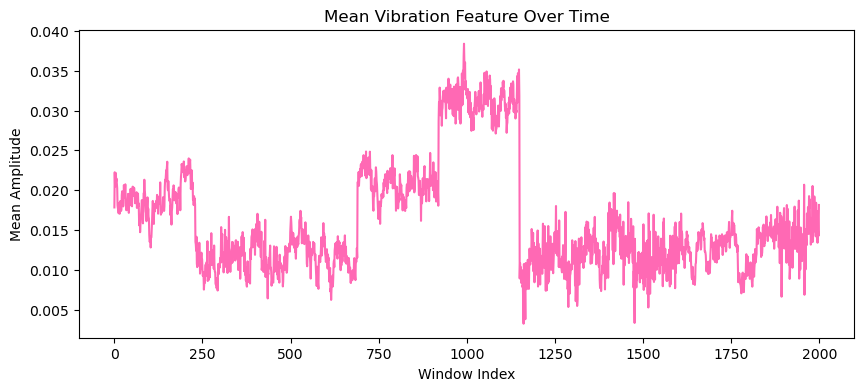

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('vibrations.csv')

print("First 5 rows:")
print(df.head())

print("\nColumn names:")
print(df.columns)

print("\nDataset shape:")
print(df.shape)

signal = df['mean'].values

plt.figure(figsize=(10,4))
plt.plot(signal[:2000],color='hotpink')
plt.title('Mean Vibration Feature Over Time')
plt.xlabel('Window Index')
plt.ylabel('Mean Amplitude')
plt.show()


In [36]:
print("Fault label distribution:")
print(df['fault'].value_counts())

Fault label distribution:
fault
Ball_007_1    230
Ball_014_1    230
Ball_021_1    230
IR_007_1      230
IR_014_1      230
IR_021_1      230
OR_007_6_1    230
OR_014_6_1    230
OR_021_6_1    230
Normal_1      230
Name: count, dtype: int64


<Figure size 1000x800 with 0 Axes>

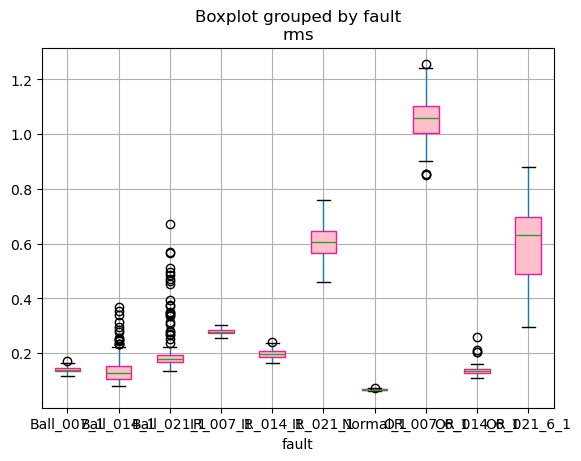

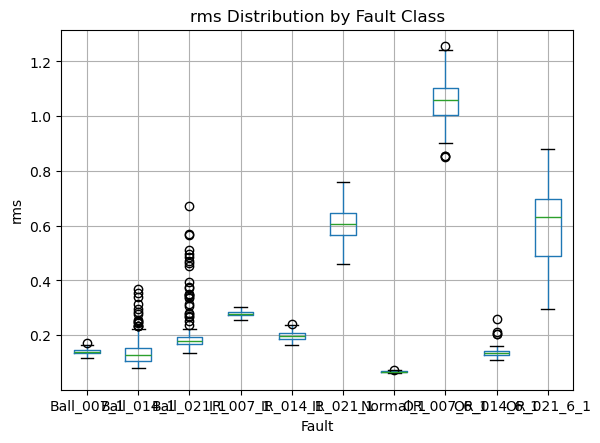

<Figure size 1000x800 with 0 Axes>

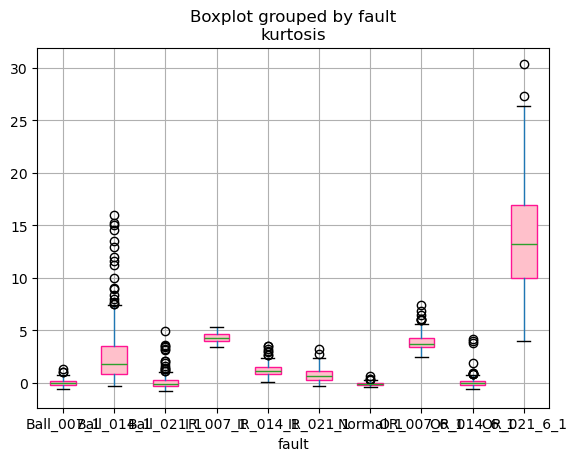

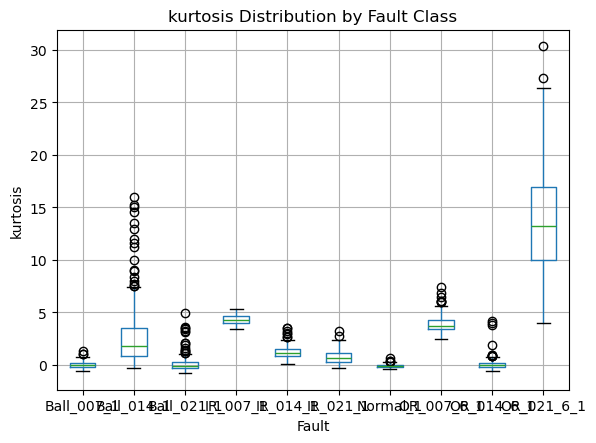

<Figure size 1000x800 with 0 Axes>

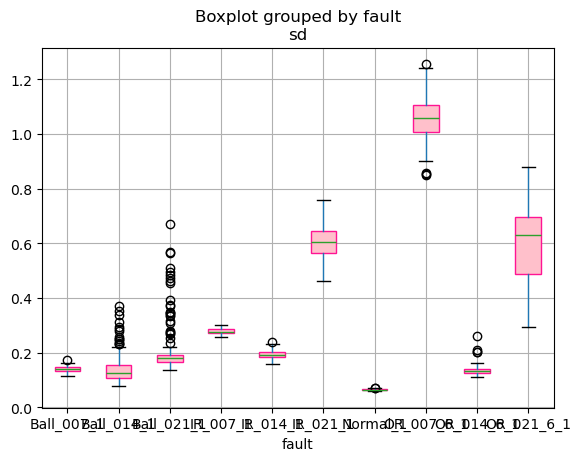

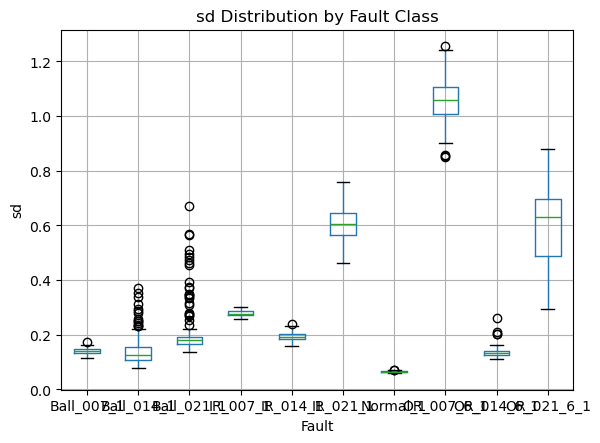

In [52]:
X = df.drop(columns=['fault'])
y = df['fault']
X.describe()

features = ['rms', 'kurtosis', 'sd']

for f in features:
    plt.figure(figsize=(10,8))
    df.boxplot(column=f, by='fault', patch_artist=True, 
               boxprops=dict(facecolor='pink', color='deeppink'))
    df.boxplot(column=f, by='fault')
    plt.title(f'{f} Distribution by Fault Class')
    plt.suptitle('')
    plt.xlabel('Fault')
    plt.ylabel(f)
    plt.show()

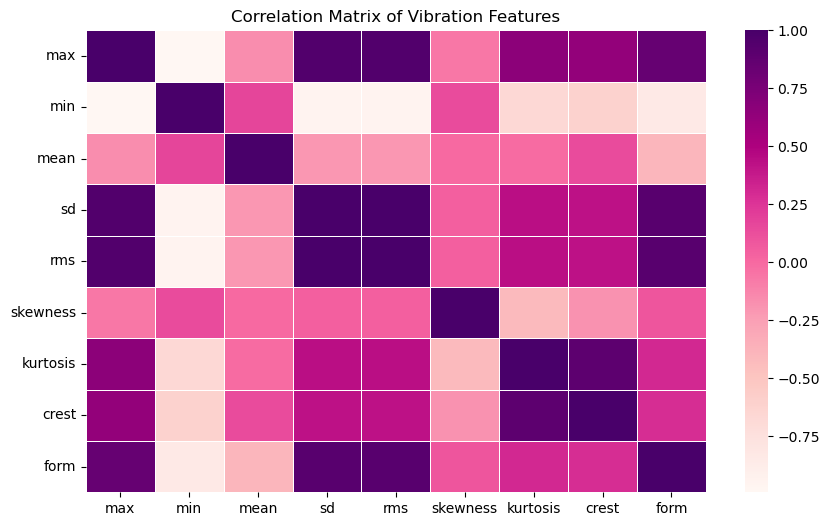

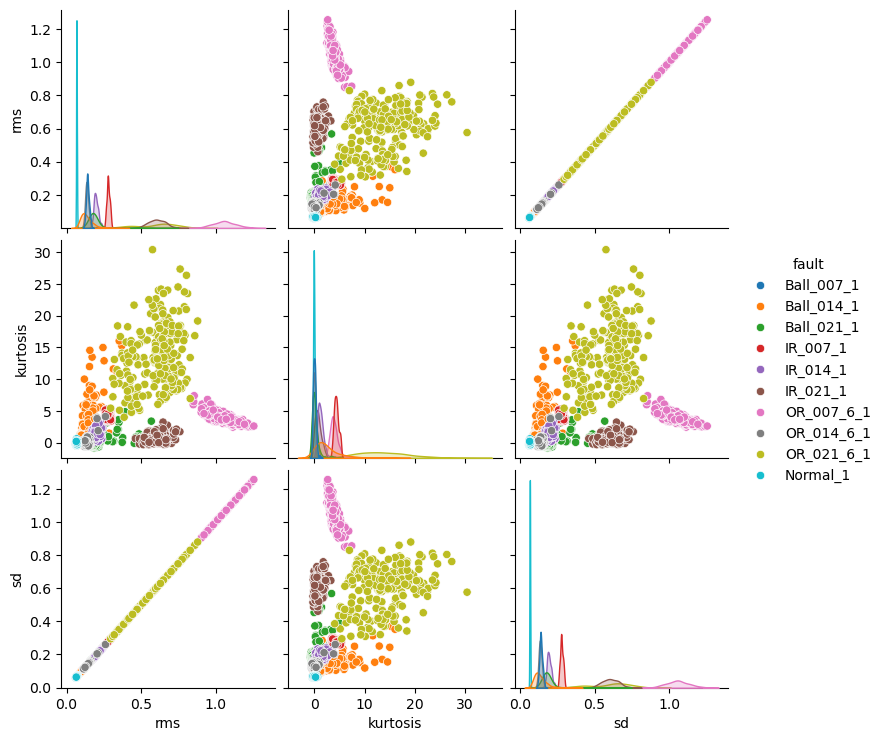

In [56]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(X.corr(), cmap='RdPu', linewidths=0.5)
plt.title('Correlation Matrix of Vibration Features')
plt.show()

sns.pairplot(df[['rms', 'kurtosis', 'sd', 'fault']], hue='fault')
plt.show()

Logistic Regression Accuracy: 0.9130434782608695

Classification Report:
              precision    recall  f1-score   support

  Ball_007_1       0.92      0.96      0.94        57
  Ball_014_1       0.91      0.74      0.82        57
  Ball_021_1       0.80      0.71      0.75        58
    IR_007_1       0.97      1.00      0.98        58
    IR_014_1       1.00      1.00      1.00        58
    IR_021_1       0.90      1.00      0.95        57
    Normal_1       0.93      0.98      0.96        58
  OR_007_6_1       0.98      1.00      0.99        57
  OR_014_6_1       0.73      0.79      0.76        57
  OR_021_6_1       0.98      0.95      0.96        58

    accuracy                           0.91       575
   macro avg       0.91      0.91      0.91       575
weighted avg       0.91      0.91      0.91       575



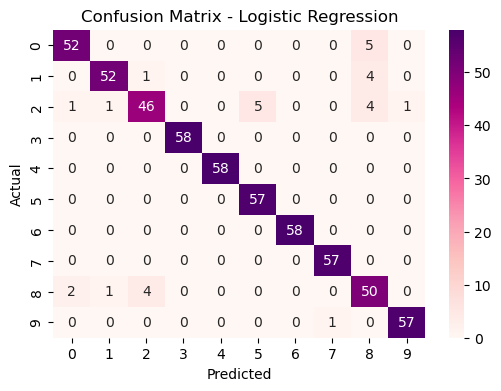

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop(columns=['fault'])
y = df['fault']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_lr))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='RdPu') 
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


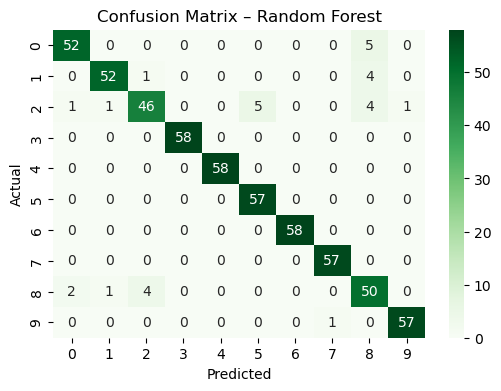

In [85]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix – Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
importances = rf.feature_importances_
features = X.columns

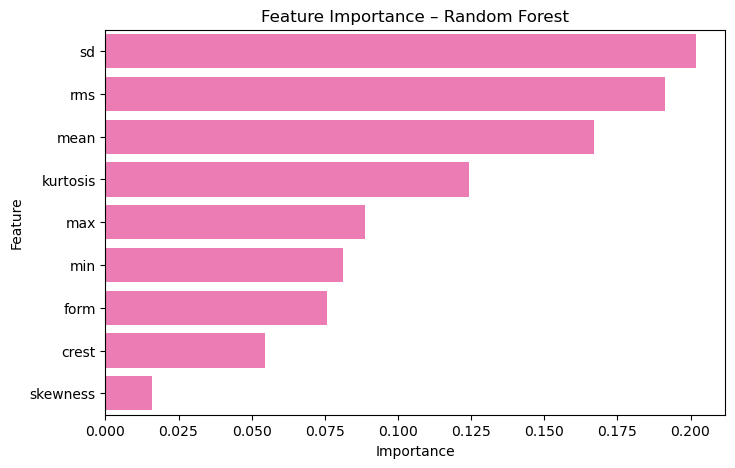

,Feature,Importance
3,sd,0.201836
4,rms,0.191224
2,mean,0.166934
6,kurtosis,0.124166
0,max,0.088654
1,min,0.081254
8,form,0.075587
7,crest,0.054461
5,skewness,0.015883


In [61]:
importances = rf.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=importance_df, color='hotpink')
plt.title('Feature Importance – Random Forest')
plt.show()

importance_df


Logistic Regression Accuracy: 0.9252173913043479

Classification Report:
              precision    recall  f1-score   support

  Ball_007_1       0.92      0.96      0.94        57
  Ball_014_1       0.94      0.77      0.85        57
  Ball_021_1       0.86      0.74      0.80        58
    IR_007_1       0.97      1.00      0.98        58
    IR_014_1       1.00      1.00      1.00        58
    IR_021_1       0.90      1.00      0.95        57
    Normal_1       1.00      1.00      1.00        58
  OR_007_6_1       0.98      1.00      0.99        57
  OR_014_6_1       0.72      0.82      0.77        57
  OR_021_6_1       0.98      0.95      0.96        58

    accuracy                           0.93       575
   macro avg       0.93      0.93      0.92       575
weighted avg       0.93      0.93      0.92       575



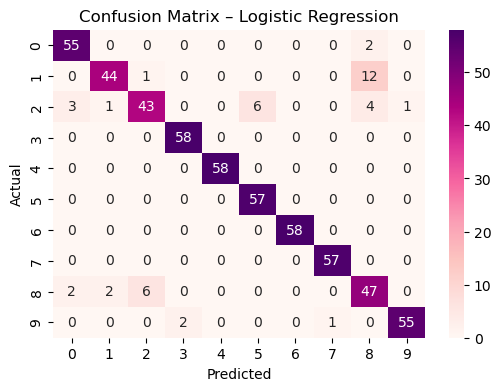

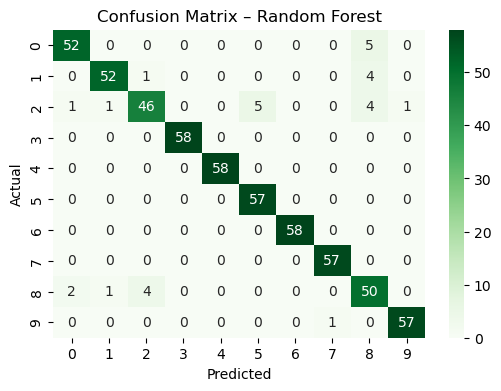

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X = df.drop(columns=['fault'])
y = df['fault']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)

print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_lr))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='RdPu')
plt.title('Confusion Matrix – Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix – Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


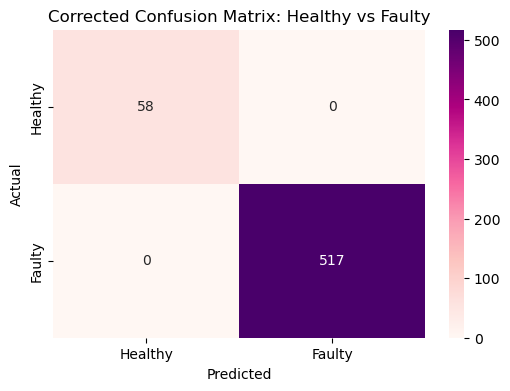

,Feature,Importance
3,sd,0.310511
4,rms,0.288796
0,max,0.186632
1,min,0.172125
8,form,0.035206
5,skewness,0.002418
2,mean,0.001989
6,kurtosis,0.001279
7,crest,0.001045


In [87]:
#is the machine faulty or not?
#is the machine faulty or not?
df['binary_fault'] = df['fault'].apply(
    lambda x: 0 if x == 'Normal_1' else 1
)

# 2. Separate features and the new binary target
# [cite: 733, 734]
X_bin = df.drop(columns=['fault', 'binary_fault'])
y_bin = df['binary_fault']

# 3. Fix the train_test_split syntax
# [cite: 735-737]
from sklearn.model_selection import train_test_split

Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    X_bin, 
    y_bin, 
    test_size=0.25, 
    random_state=42, 
    stratify=y_bin
)

# 4. Train and Predict
# [cite: 738, 739]
from sklearn.ensemble import RandomForestClassifier
rf_bin = RandomForestClassifier(n_estimators=200, random_state=42)
rf_bin.fit(Xb_train, yb_train)
yb_pred = rf_bin.predict(Xb_test)

# 5. Generate Corrected Confusion Matrix
# [cite: 740-754]
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_bin = confusion_matrix(yb_test, yb_pred, labels=[0, 1])

plt.figure(figsize=(6,4))
sns.heatmap(
    cm_bin, 
    annot=True, 
    fmt='d', 
    cmap='RdPu',
    xticklabels=['Healthy', 'Faulty'], 
    yticklabels=['Healthy', 'Faulty']
)
plt.title('Corrected Confusion Matrix: Healthy vs Faulty')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Changed from best_rf to rf_bin since that's the model we trained
importances = rf_bin.feature_importances_

# Changed X to X_bin to match the features used in training
importance_df = pd.DataFrame({
'Feature': X_bin.columns,
'Importance': importances
}).sort_values(by='Importance', ascending=False)

importance_df

In [86]:
#assuming these values to show the benefits of the model
cost_per_failure = 50000      # ₹ (downtime + repair)
annual_failures = 12         # failures per machine per year
downtime_reduction = 0.4     # 40% reduction using PdM

annual_loss = cost_per_failure * annual_failures
annual_savings = annual_loss * downtime_reduction

annual_loss, annual_savings

(600000, 240000.0)